In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [5]:
apple = pd.read_csv('aapl/price_data.csv')

amazon = pd.read_csv('amzn/price_data.csv')

google = pd.read_csv('googl/price_data.csv')

meta = pd.read_csv('meta/price_data.csv')

microsoft = pd.read_csv('msft/price_data.csv')

nvidia = pd.read_csv('nvda/price_data.csv')

def calculate_return_rate(starting_price: float, ending_price: float):
    return (ending_price - starting_price) / starting_price

In [7]:
closing_prices = pd.DataFrame({
    'date': apple['date'],
    'apple': apple['adjusted close'],
    'amazon': amazon['adjusted close'],
    'google': google['adjusted close'],
    'meta': meta['adjusted close'],
    'nvidia': nvidia['adjusted close'],
    'microsoft': microsoft['adjusted close']
})

melted = closing_prices.melt(id_vars='date', value_vars=['apple', 'amazon', 'google', 'meta', 'nvidia', 'microsoft'])
melted.head()

,date,variable,value
0,2019-01-31,apple,39.8858
1,2019-02-28,apple,41.6715
2,2019-03-29,apple,45.7147
3,2019-04-30,apple,48.2947
4,2019-05-31,apple,42.2981


C:\Users\arfe\AppData\Local\Temp\ipykernel_3576\1544345725.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=g.get_xticklabels(), rotation=90)


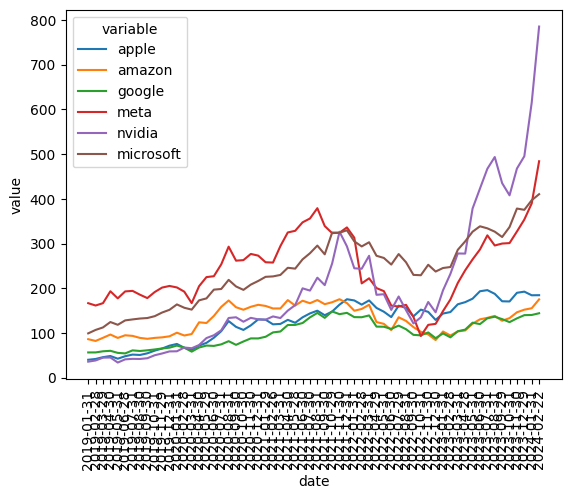

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.lineplot(data=melted, x='date', y='value', hue='variable')
g.set_xticklabels(labels=g.get_xticklabels(), rotation=90)
plt.show()

<Axes: xlabel='security', ylabel='return rate'>

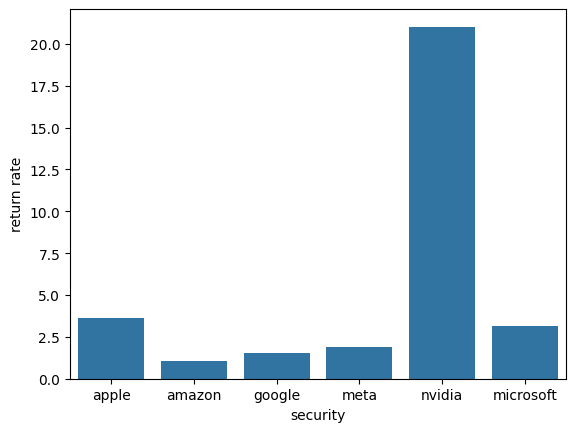

In [9]:
apple.head()
ar = calculate_return_rate(apple['adjusted close'].iloc[0], apple['adjusted close'].iloc[-1])
azr = calculate_return_rate(amazon['adjusted close'].iloc[0], amazon['adjusted close'].iloc[-1])
gor = calculate_return_rate(google['adjusted close'].iloc[0], google['adjusted close'].iloc[-1])
metr = calculate_return_rate(meta['adjusted close'].iloc[0], meta['adjusted close'].iloc[-1])
nvr = calculate_return_rate(nvidia['adjusted close'].iloc[0], nvidia['adjusted close'].iloc[-1])
mir = calculate_return_rate(microsoft['adjusted close'].iloc[0], microsoft['adjusted close'].iloc[-1])

return_rate_by_company = [
    ('apple', ar),
    ('amazon', azr),
    ('google', gor),
    ('meta', metr),
    ('nvidia', nvr),
    ('microsoft', mir)
]

return_rate_pd = pd.DataFrame(data=return_rate_by_company, columns=['security', 'return rate'])
return_rate_pd

b = sns.barplot(data=return_rate_pd, x='security', y='return rate')
b


In [ ]:
appl = stocks.set_index(pd.DatetimeIndex(stocks['date'].values))
# remove date value
# appl.drop(['date'], inplace=True, axis=1)
# appl_monthly_return = appl['adjusted close'].pct_change()
# appl_monthly_return = pd.DataFrame({'returns %': appl_monthly_return})
# appl_np_return = appl_monthly_return['returns %'].dropna().to_numpy()
# geom_mean_monthly = (np.prod((1 + appl_np_return)) ** 1/len(appl_np_return)) - 1
# geom_mean_monthly
ret_percentage = (appl['adjusted close'].iloc[-1] - appl['adjusted close'].iloc[0]) / appl['adjusted close'].iloc[0]
# ret_percentage
# 1000 + (1000 * ret_percentage)
1000 * (1 + ret_percentage)
# appl

In [ ]:
stocks.tail()

In [ ]:
sp500.tail()

In [ ]:
scaler = MinMaxScaler()
stocks['normalized_adjusted_close'] = scaler.fit_transform(stocks[['adjusted close']])
sp500['normalized_adjusted_close'] = scaler.fit_transform(sp500[['Adj Close']])

# len(stocks['normalized_adjusted_close'])



In [ ]:
# len(sp500['normalized_adjusted_close'])

In [ ]:
adjusted_close_data = pd.DataFrame({
    'date': sp500['Date'],
    'aapl': stocks['normalized_adjusted_close'],
    'sp500': sp500['normalized_adjusted_close']
})

adjusted_close_data

In [ ]:
adjusted_close_data = adjusted_close_data.melt(id_vars=['date'], value_vars=['aapl', 'sp500'])
adjusted_close_data

In [ ]:
adjusted_close_data.rename(columns={'value': 'adjusted close price'}, inplace=True)
sns.lineplot(data=adjusted_close_data, x='date', y='adjusted close price', hue='variable')

In [1]:
from vega_datasets import data

s = data.stocks()
s[s['symbol'] == 'IBM']

,symbol,date,price
246,IBM,2000-01-01,100.52
247,IBM,2000-02-01,92.11
248,IBM,2000-03-01,106.11
249,IBM,2000-04-01,99.95
250,IBM,2000-05-01,96.31
...,...,...,...
364,IBM,2009-11-01,125.79
365,IBM,2009-12-01,130.32
366,IBM,2010-01-01,121.85
367,IBM,2010-02-01,127.16
